In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as pd
from pygem_eb.processing.plotting_fxns import *
from objectives import *

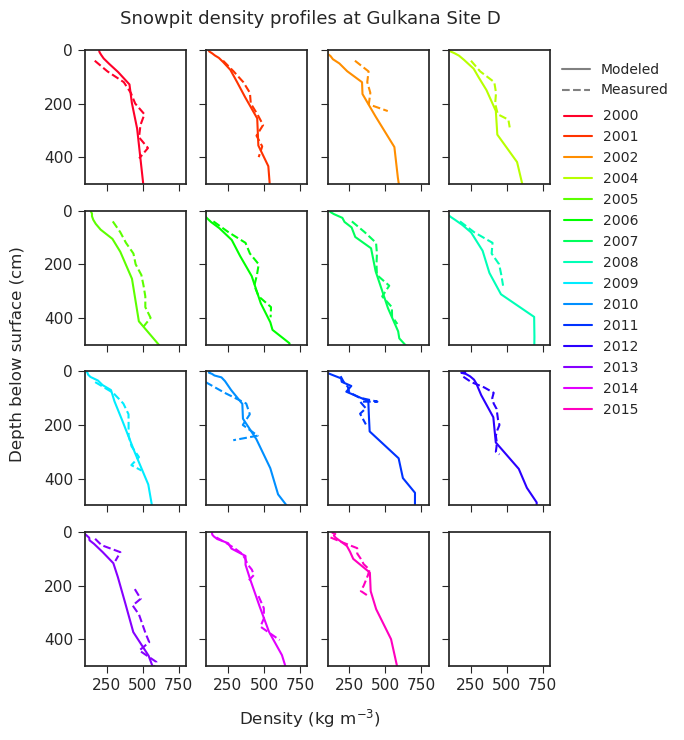

In [98]:
site = 'D'
ds,s,e =  getds(f'../Output/EB/Gulkana_2024_10_25_{site}_1.nc')
fp = '../MB_data/Point/gulkana/pitcore/'
import os
files = os.listdir(fp)
profiles = {'sbd':{},'density':{}}
for f in files:
    s = f.split('_')[-1].split('.')[0]
    if s == site and 'Pit' in f:
        if '_04' in f:
            year = int(f[8:12])
            df = pd.read_csv(fp + f)
            if len(df['sample_bottom_depth']) > 2:
                profiles['sbd'][year] = df['sample_bottom_depth'].to_numpy()
                density = df['sample_weight'] / df['volume'] * 1000
                profiles['density'][year] = density.to_numpy()

years = np.arange(2000,2025)
years = np.sort(list(set(years)&set(profiles['sbd'])))[:-1]
fig,axes = plt.subplots(4,4,figsize=(6,8),sharex=True,sharey=True)
axes = axes.flatten()
norm = mpl.colors.Normalize(vmin=years[0],vmax=years[-1])
cmap = mpl.colormaps.get_cmap('gist_rainbow')
for ax,year in zip(axes,years):
    dsyear = ds.sel(time=pd.to_datetime(f'{year}-04-20'))
    lheight = dsyear.layerheight.values*100
    ldepth = np.array([np.sum(lheight[:i+1])-(lheight[i]/2) for i in range(len(lheight))])
    ax.plot(dsyear['layerdensity'].values,ldepth,color=cmap(norm(year)))
    ax.plot(profiles['density'][year],profiles['sbd'][year],color=cmap(norm(year)),linestyle='--')
    axes[0].plot(np.nan,np.nan,label=year,color=cmap(norm(year)))
    if year == years[3]:
        ax.plot(np.nan,np.nan,label='Modeled',color='grey')
        ax.plot(np.nan,np.nan,label='Measured',linestyle='--',color='grey')
    ax.invert_yaxis()
    ax.set_ylim(500,0)
    ax.tick_params(length=5,labelsize=11)
    ax.set_xlim(100,800)
fig.supxlabel('Density (kg m$^{-3}$)',fontsize=12,y=0.03)
fig.supylabel('Depth below surface (cm)',fontsize=12,x=0)
axes[-1].tick_params(length=5,labelsize=11)
axes[0].legend(bbox_to_anchor=(5.6,0.65))
axes[3].legend(bbox_to_anchor=(2.3,1))
fig.suptitle(f'Snowpit density profiles at Gulkana Site {site}',fontsize=13,y=0.93)
# plt.show()
plt.savefig(f'../MB_data/Point/gulkana{site}_pits_modeled.png',dpi=200,bbox_inches='tight')

Internal acc: 0.000 m w.e.


(<Figure size 300x600 with 1 Axes>,
 <Axes: title={'center': 'MAE = 0.237 m\nModeled MB: -1.619 m w.e.\nMeasured MB: -1.790 m w.e.'}, ylabel='Surface height change (m)'>)

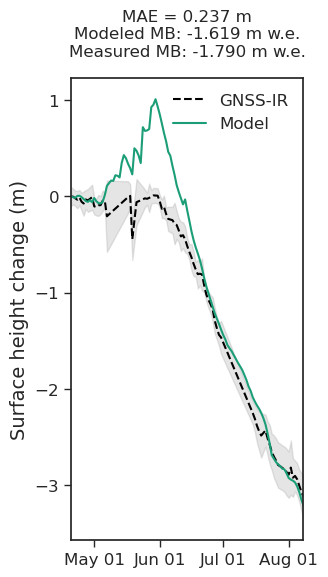

In [ ]:
bds,startdate,enddate = getds(f'../Output/EB/Gulkana_10_29_2024B_33.nc')
# fig, ax = visualize_layers(bds,pd.date_range(startdate,enddate),['layertemp'])
# ax.axvline(pd.to_datetime('2024-05-27'),color='black')
# fig.suptitle('Using lowered daytime temperatures')
# plt.savefig('../Output/EB/better_ripening.png',dpi=180,bbox_inches='tight')

Compare albedo

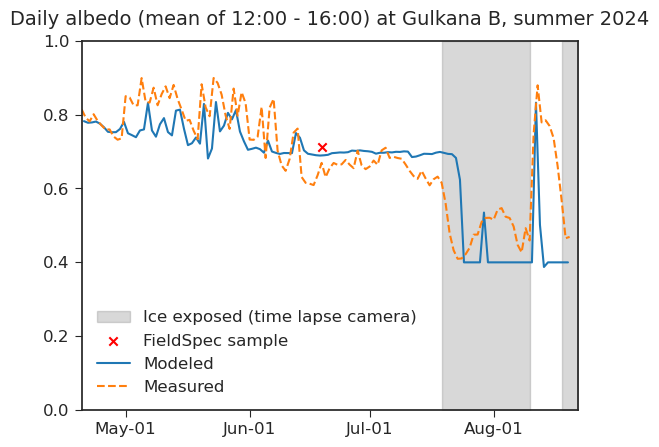

In [209]:
df = pd.read_csv('/home/claire/research/climate_data/AWS/Preprocessed/CLAWS_2024_allvars.csv',index_col=0)
df.index = pd.to_datetime(df.index) # - pd.Timedelta(hours=8)
# df['albedo'] = df['SWout'] / df['SWin']
daily_albedo = []
dates = pd.date_range('2024-04-20','2024-08-22',freq='d')
for date in dates:
    start = pd.to_datetime(str(date.date())+' 12:00')
    end = pd.to_datetime(str(date.date())+' 16:00')
    # print(df.loc[start:end,'albedo'].values)
    daily_albedo.append(np.mean(df.loc[start:end,'albedo']))
y = np.arange(0,1.1,0.1)
fig,ax = plt.subplots()
ax.fill_betweenx(y,[pd.to_datetime('2024-07-19')],[pd.to_datetime('2024-08-10')],color='grey',alpha=0.3,label='Ice exposed (time lapse camera)')
ax.fill_betweenx(y,[pd.to_datetime('2024-08-18')],[pd.to_datetime('2024-08-22')],color='grey',alpha=0.3)
ax.scatter(pd.to_datetime('2024-06-19'),0.7123,marker='x',color='red',label='FieldSpec sample')
ax.set_xlim(dates[0],dates[-1])
ax.set_ylim(0,1)
ax.tick_params(labelsize=12)
ax.set_xticks(pd.date_range(dates[0],dates[-1],freq='MS'))
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%b-%d'))
ax.set_title('Daily albedo (mean of 12:00 - 16:00) at Gulkana B, summer 2024',fontsize=14,y=1.02)
plt.tick_params(size=5)
dsp = bds.sel(time=pd.date_range('2024-04-20 14:00','2024-08-19 14:00'))
ax.plot(dsp.time,dsp['albedo'],label='Modeled')
ax.plot(dates,daily_albedo,label='Measured',linestyle='--')
ax.legend(fontsize=12)
# plt.show()
plt.savefig('/home/claire/research/Output/EB/albedo_modeled_10_30.png',dpi=150,bbox_inches='tight')


Internal acc: 0.000 m w.e.
Internal acc: 0.086 m w.e.


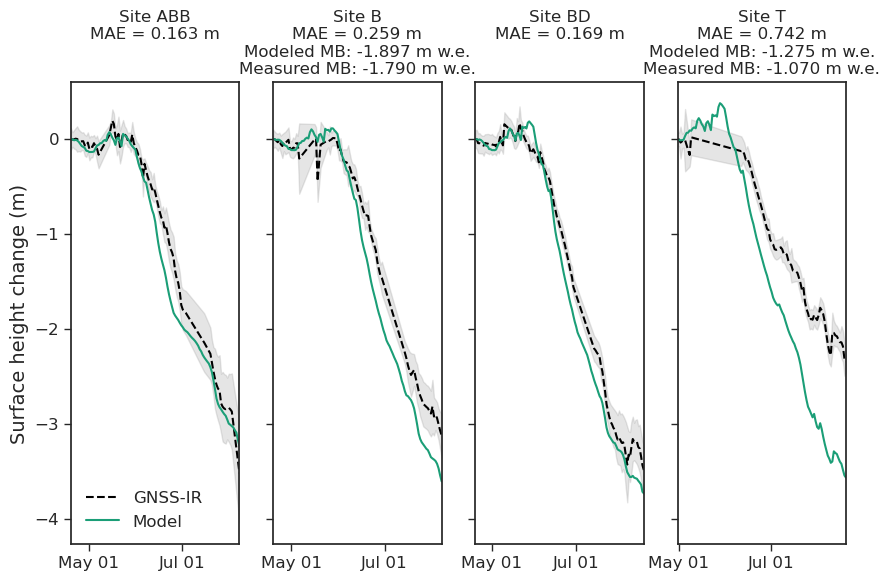

In [ ]:
lala = 36
newfig,axes = plt.subplots(1,4,figsize=(10,6),sharey=True)
for i,site in enumerate(['ABB','B','BD','T']):
    if site == 'B':
        id = lala + 14
    else:
        id = lala
    ds,startdate,enddate = getds(f'../Output/EB/Gulkana_10_29_2024{site}_{id}.nc')
    axes[i] = cumulative_mass_balance(site,ds,plot=True,plot_ax=axes[i])
    axes[i].set_title(f'Site {site}\n'+axes[i].get_title())
    if i != 0:
        axes[i].set_ylabel('')
        axes[i].get_legend().remove()
    axes[i].set_xticks(pd.date_range(startdate,enddate,freq='2MS'))
    # if site == 'T':
    #     fig.suptitle(f'Site {site}'+' with\n1.5$^{\circ}$C temperature bias and\n 10x wind speed reduction',y=1.03)
    
    if site not in ['ABB','BD']:
        df_stakes = pd.read_csv('../MB_data/Gulkana/Input_Gulkana_Glaciological_Data.csv',index_col=0)
        stake_melt = df_stakes.loc[df_stakes['site_name'] == site].loc[2024]
        spring_date = df_stakes.loc[df_stakes['site_name'] == site].loc[2024,'spring_date']
        spring_date = max(pd.to_datetime(spring_date),pd.to_datetime('2024-04-20'))
        fall_date = df_stakes.loc[df_stakes['site_name'] == site].loc[2024,'fall_date']
        fall_date = min(pd.to_datetime(fall_date),pd.to_datetime('2024-08-19'))
        ds = ds.sel(time=pd.date_range(spring_date,fall_date,freq='h'))
        stake_melt = stake_melt['ba'] - stake_melt['bw']
        model_cmb = ds.accum + ds.refreeze - ds.melt
        model_melt = model_cmb.sum().values
        # ax.set_title(f'Modeled summer MB: {model_melt:.2f}\nMeasured summer MB: {stake_melt:.2f}')
if lala == 19:
    newfig.suptitle('Using modeled albedo and $k_p=3$',y=1.05,fontsize=14)
    label = '_modelalbedo_kp3'
elif lala == 20:
    newfig.suptitle('Using modeled albedo and $k_p=1$',y=1.05,fontsize=14)
    label = '_modelalbedo_kp1'
elif lala == 21:
    newfig.suptitle('Using measured albedo and $k_p=1$',y=1.05,fontsize=14)
    label = '_kp1'
elif lala == 30:
    newfig.suptitle('Using modeled albedo every 2 hrs and $k_p=3$',y=1.05,fontsize=14)
    label = '_kp3'
# plt.savefig(f'/home/claire/research/Output/EB/gulkana_dh{label}.png',dpi=180,bbox_inches='tight')
plt.show()

ACTUAL CALIBRATION

In [ ]:
# FIND BEST RUN IN A SET
date = '10_18'
path_out = f'/home/claire/research/Output/calibration/{date}_0/'
sites= ['AB','B','D']
# fn = f'kw{kw}_ksnow{k_snow}_aice{a_ice}_site{site}_0.nc'
dsdict = {'AB':[],'B':[],'D':[]}
outdict = {'AB':[],'B':[],'D':[]}
for i in range(85):
    fn = f'calibration_{date}_run{i}_0.nc'
    try:
        ds,startdate,enddate = getds(path_out+fn)
    except:
        print(fn,'doesnt exist')
        continue
    site = ds.attrs['site']
    winter,summer = seasonal_mass_balance(site,ds)
    dsdict[site].append(ds)
    # if i % 5 == 0:
    #     print(ds.attrs[param])
    # outdict[site].append(np.mean([winter,summer]))
    outdict[site].append(summer)
    # print(ds.attrs['k_snow'],winter,summer,np.mean([winter,summer]))
best = {}
for site in sites:
    best[site] = dsdict[site][np.argmin(outdict[site])]
    print(site,np.argmin(outdict[site]))
    # simple_plot(ds,['2004-04-20','2004-10-20'],[['albedo']],res='d')

AB 27
B 25
D 23


In [6]:
result_df = pd.DataFrame(data=np.zeros((len(sites),3)),columns=sites,index=['kp','kw','a_ice'])
for site in sites:
    ds = best[site]
    result_df.loc['kp',site] = float(ds.attrs['kp'])
    if site == 'D':
        result_df.loc['kw',site] = 2 #float(ds.attrs['kw'])
        result_df.loc['a_ice',site] = 0.4
    else:
        result_df.loc['a_ice',site] = float(ds.attrs['a_ice'])
        result_df.loc['kw',site] = 3
# result_df.to_csv(f'/home/claire/research/Gulkana_params_{date}_HIGHWIND.csv',sep=',')
print(result_df)

         AB    B    D
kp     3.20  3.2  3.2
kw     3.00  3.0  2.0
a_ice  0.25  0.4  0.4


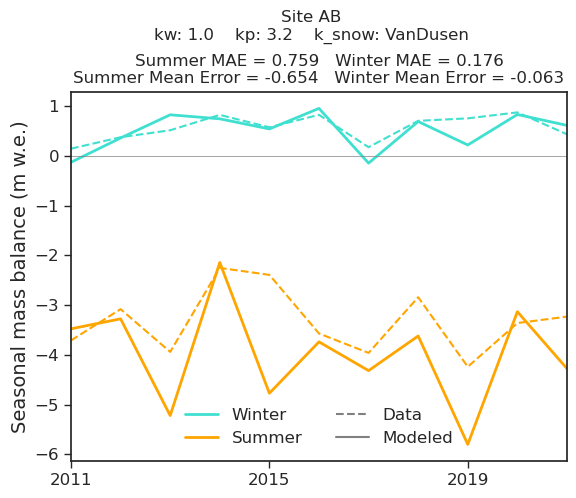

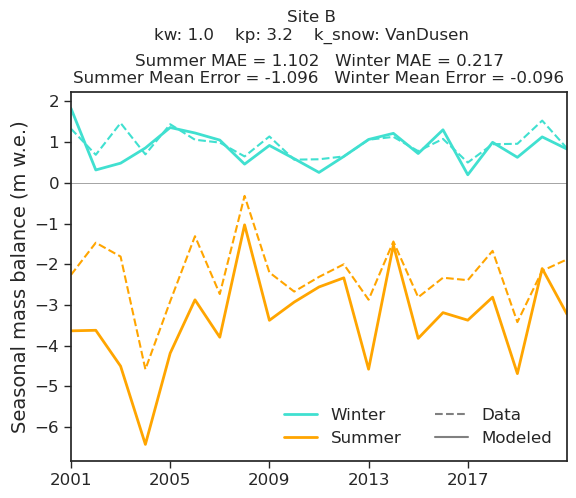

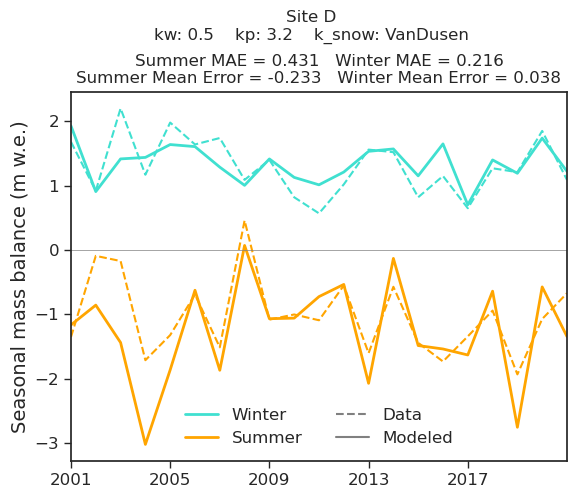

In [3]:
for site in sites:
    # ds = best[site]
    ds = dsdict[site][-1]
    # ds = xr.open_dataset(f'/home/claire/research/Output/EB/Gulkana_10_09_paramset_{site}_0.nc')
    param = 'kw' #if site == 'D' else 'a_ice'
    k_snow = ds.attrs['k_snow']
    kw = ds.attrs['kw']
    a_ice = ds.attrs['a_ice']
    kp = ds.attrs['kp']
    # kp = result_df.loc['kp',site]
    # kw = result_df.loc['kw',site]
    # a_ice = result_df.loc['a_ice',site]
    param_value = kw if param == 'kw' else a_ice # float(ds.attrs[param])
    fig,ax = seasonal_mass_balance(data_fp,ds,site,plot=True)
    fig.suptitle(f'Site {site}\n{param}: {param_value}    kp: {kp}    k_snow: {k_snow}',y=1.05)
    # plt.savefig(f'/home/claire/research/Output/calibration/{date}_paramsMERRA2_{site}.png',dpi=200,bbox_inches='tight')

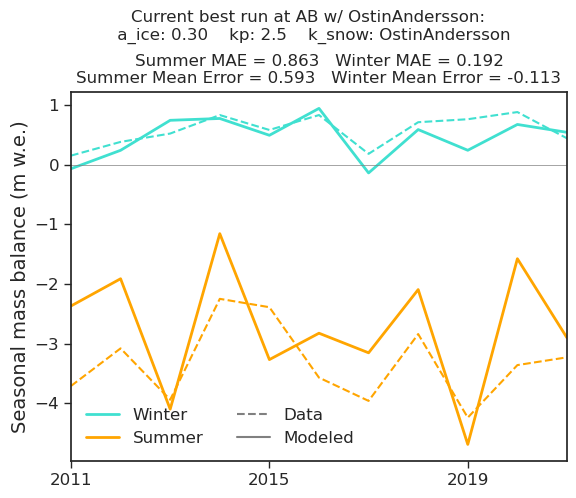

In [45]:
k_snow = ds.attrs['k_snow']
kw = ds.attrs['kw']
a_ice = ds.attrs['a_ice']
kp = ds.attrs['kp']
param_value = float(ds.attrs[param])
fig,ax = seasonal_mass_balance(data_fp,ds,site,plot=True)
fig.suptitle(f'Current best run at {site}: \n {param}: {param_value:.2f}    kp: {kp}    k_snow: {k_snow}',y=1.05)
# plt.show()
# plt.savefig(f'/home/claire/research/Output/calibration/10_05_0/best_{site}.png',dpi=200,bbox_inches='tight')

In [234]:
path_out = '/home/claire/research/Output/calibration/09_24/'

# Parameter sets
aa = [0.2,0.4,0.6]
ww = [0.25,0.5,0.75,1]
kk = ['Sturm','Douville','Jansson'] #,'OstinAndersson','VanDusen']
params_dict = {'kw':ww,'k_snow':kk,'a_ice':aa} # 'kw':ww,

# Get the lengths of each parameter list for the result array shape
shape = [len(v) for v in params_dict.values()]

# Initialize result arrays with a dimension for site (3 sites + 1 for the average)
winter_result = np.ones([4] + shape)
summer_result = np.ones([4] + shape)

# Initialize lists for storing the parameters
params_list = {key: [] for key in params_dict}

# Generate combinations of all parameters
all_combos = itertools.product(*params_dict.values())
for idx, param_values in enumerate(all_combos):
    # Unpack indices
    indices = np.unravel_index(idx, shape)

    # Store parameter set
    for param_name, param_value in zip(params_dict.keys(), param_values):
        params_list[param_name].append(param_value)
    
    # Iterate over sites
    for s, site in enumerate(['AB', 'B', 'D']):
        kw = 0.25 if site == 'D' else 1
        fn = f'kw{kw}_'

        # fn = ''
        for param_name, param_value in zip(params_dict.keys(), param_values):
            fn += param_name.replace('_','')+str(param_value)+'_'
        fn += f'site{site}_0.nc'

        try:
            ds, startdate, enddate = getds(path_out + fn)
            winter, summer = seasonal_mass_balance(data_fp, ds, site=site, method='MAE')
        except:
            winter, summer = (np.nan, np.nan)
            print(fn + ' does not exist')
        
        # Store results in the corresponding array
        winter_result[s][indices] = winter
        summer_result[s][indices] = summer

    # Compute site averages and store in the last index (3rd index in the result arrays)
    winter_result[3][indices] = np.mean(winter_result[:3,*indices])
    summer_result[3][indices] = np.mean(summer_result[:3,*indices])

In [235]:
best = {'winter': {key: [] for key in params_dict}, 
        'summer': {key: [] for key in params_dict}}

if summer_result.shape == (4,4,3,3):
    print('When including kw as a parameter:')
elif summer_result.shape == (4,3,3):
    print('When setting kw = 0.25 at site D, 1 elsewhere:')
for site in ['mean','AB','B','D','mean']:
    idx = np.where(np.array(['AB','B','D','mean']) == site)[0]
    best_winter = np.argmin(winter_result[idx])
    best_summer = np.argmin(summer_result[idx])
    for key in params_dict:
        best['winter'][key] = params_list[key][best_winter]
        best['summer'][key] = params_list[key][best_summer]
    if site == 'mean':
        print('Best winter parameter set overall:',best['winter'])
        print('Best summer parameter set overall:',best['summer'])
        print()
    else:
        print(f'Best winter parameter set at site {site}:',best['winter'])
        print(f'Best summer parameter set at site {site}:',best['summer'])

When setting kw = 0.25 at site D, 1 elsewhere:
Best winter parameter set overall: {'k_snow': 'Sturm', 'a_ice': 0.6}
Best summer parameter set overall: {'k_snow': 'Jansson', 'a_ice': 0.6}

Best winter parameter set at site AB: {'k_snow': 'Jansson', 'a_ice': 0.4}
Best summer parameter set at site AB: {'k_snow': 'Jansson', 'a_ice': 0.2}
Best winter parameter set at site B: {'k_snow': 'Sturm', 'a_ice': 0.6}
Best summer parameter set at site B: {'k_snow': 'Jansson', 'a_ice': 0.6}
Best winter parameter set at site D: {'k_snow': 'Sturm', 'a_ice': 0.6}
Best summer parameter set at site D: {'k_snow': 'Sturm', 'a_ice': 0.2}
Best winter parameter set overall: {'k_snow': 'Sturm', 'a_ice': 0.6}
Best summer parameter set overall: {'k_snow': 'Jansson', 'a_ice': 0.6}



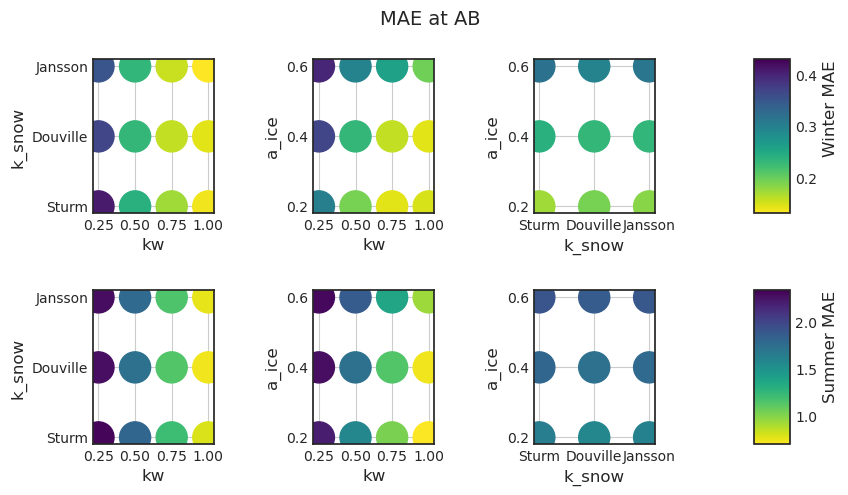

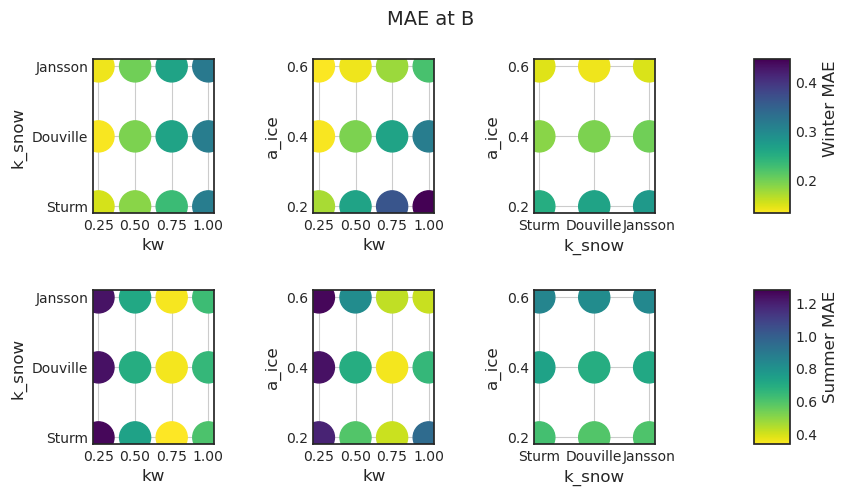

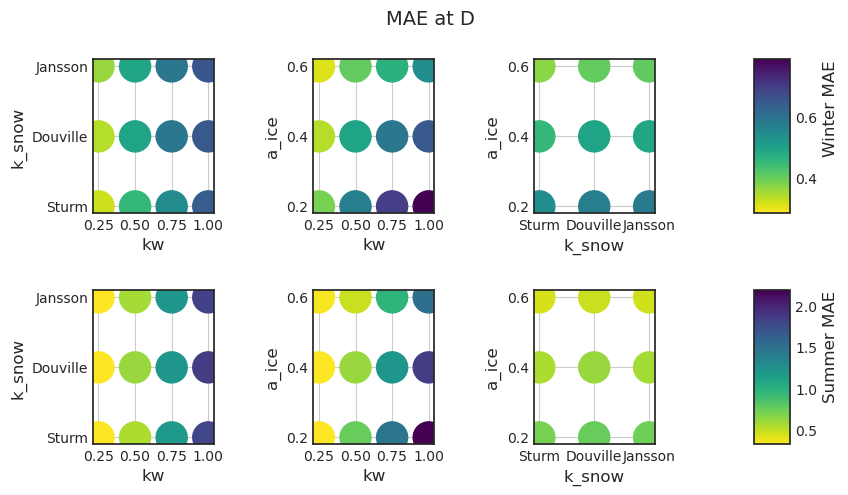

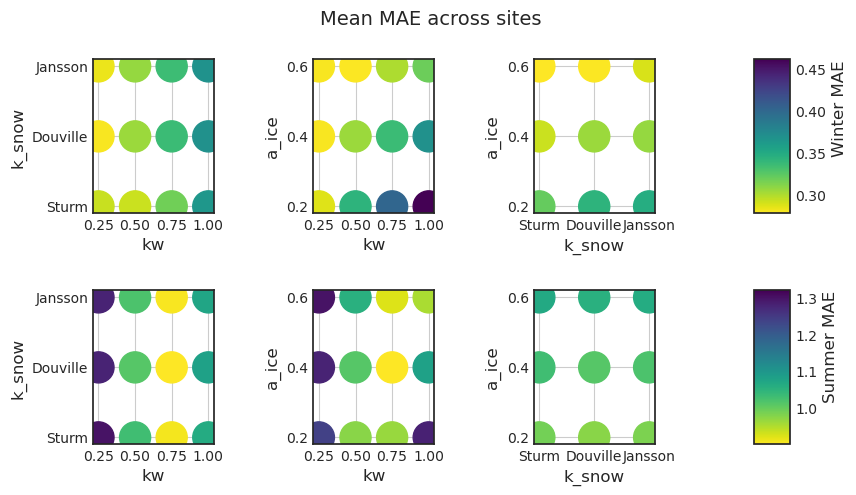

In [243]:
for site in ['AB','B','D','mean']:
    idx = np.where(np.array(['AB','B','D','mean']) == site)[0][0]
    fig, axes = grid_plot(params_dict,summer_result[idx],winter_result[idx])
    if site == 'mean':
        title_first = f'Mean MAE across sites'
    else:
        title_first = f'MAE at {site}'
    if summer_result.shape == (4,4,3,3):
        fig.suptitle(title_first,fontsize=14)
        plt.savefig(f'/home/claire/research/Output/Figs/grid_plot_{site}.png',dpi=200,bbox_inches='tight')
    elif summer_result.shape == (4,3,3):
        fig.suptitle(f'{title_first}\nWith kw=0.25 at D and 1 elsewhere',fontsize=14)
        plt.savefig(f'/home/claire/research/Output/Figs/grid_plot_{site}_nokw.png',dpi=200,bbox_inches='tight')